# Homework 2

1) The probability of rolling snake eyes (two ones) is the probability of each of those appearing multiplied

$$
\frac{1}{6}\times\frac{1}{6} = \frac{1}{36}
$$
   To rolls a seven, the dice can be in any one of 6 combinations. The probability of any single face appearing is $ \frac{1}{6} $ and the probability of any single sum is then $ \frac{1}{36} $. Using this knowledge the total probability of rolling a seven is 
   $$ 6 \times \frac{1}{36} = \frac{1}{6} $$

2) The probability of the sums of 2 six sided dice is given by the convolution of their respective probability density functions. The probability density function of a single die is has a value of $\frac{1}{6}$ from 1 to 6 and is 0 otherwise. It is a discrete function since it can only take on values 1 through 6.

  Each combination of the individual combination of the two die, regardless of the sum, then has a probability of $\frac{1}{36}$. To find the probability of a sum, you must count the number of possible ways to get that sum from the faces of the die and multiply by 1/36. 

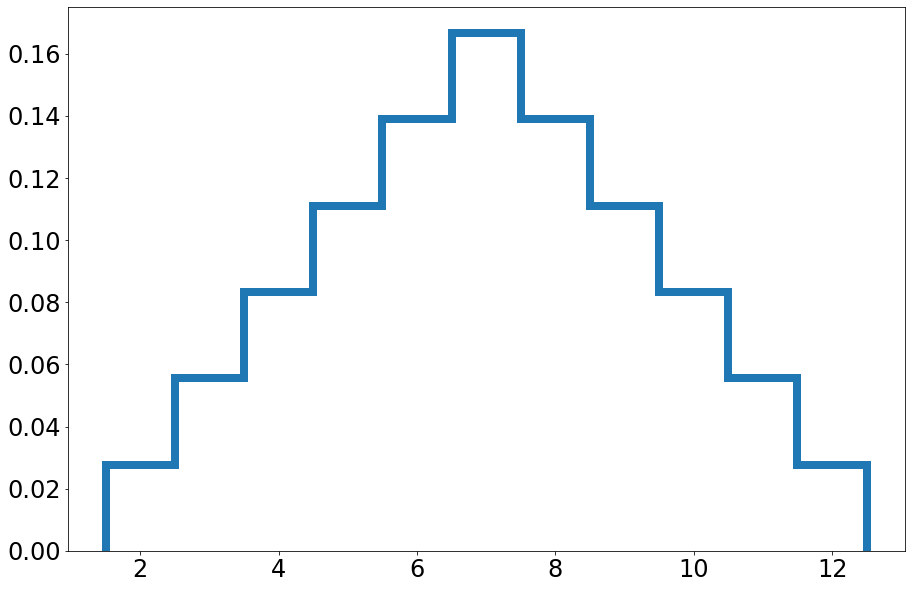

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# fig, ax = plt.subplots(1, 1)
plt.rcParams["figure.figsize"] = (15,10)
plt.tick_params(labelsize = 24)
x = np.arange(1, 12, 1)
edges = np.arange(1.5, 13.5, 1) 

pdf1 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
pdf2 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

conv2  = np.convolve(pdf1, pdf2)

plt.stairs(conv2, edges, linewidth = 8)

The above plot is the probability of the sums from two die. 

3) The mean and standard deviation can be computed by defining the convultution as an arbitrary distribution using the `stats.rv_discrete` object and calling the mean and var methods.

In [3]:
sums = np.arange(2,13,1)

pdfconv = stats.rv_discrete(values = (sums, conv2))

print("The mean of the convovled distributions is ", pdfconv.mean(),
      "and the variance is", pdfconv.var())

The mean of the convovled distributions is  6.999999999999998 and the variance is 5.833333333333357


4) Graph the **average** of 10 dice

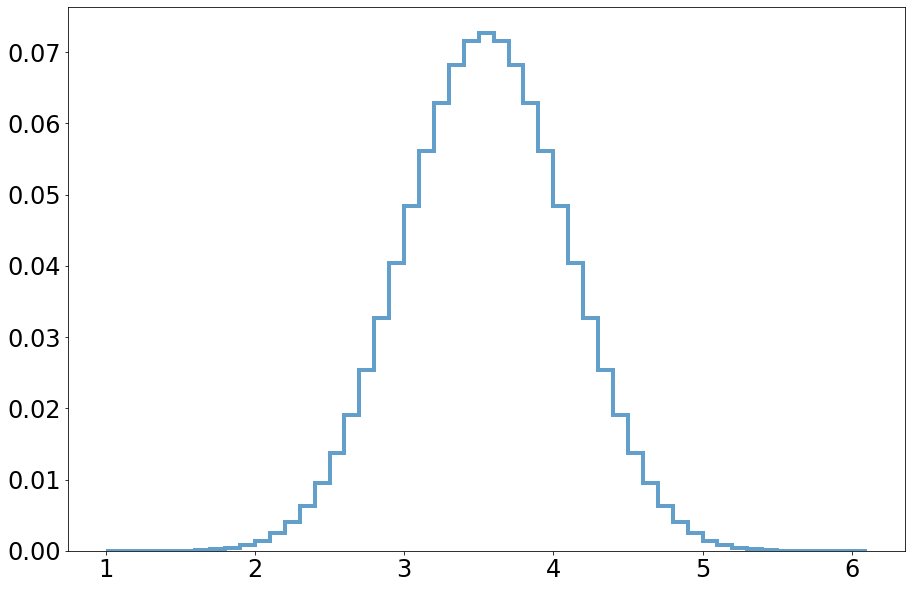

In [4]:
pdf1 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
conv10 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

for i in range(9):
    conv10  = np.convolve(conv10, pdf1)

x_plot = np.arange(10, 62) / 10 
sums10 = np.arange(10, 61) / 10

plt.tick_params(labelsize = 24)
plt.stairs(conv10, x_plot, linewidth = 4, alpha = 0.7)

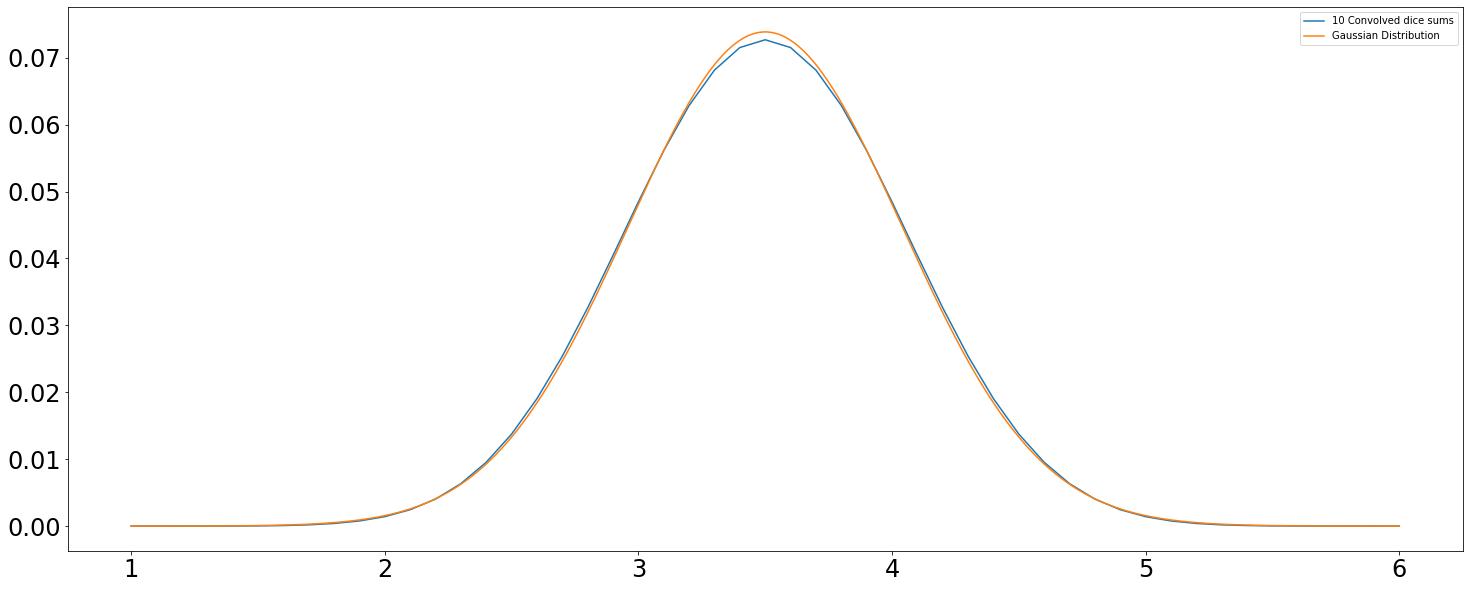

In [5]:
plt.rcParams["figure.figsize"] = (25,10)

dice_dist = stats.rv_discrete(values = (sums10, conv10))

plt.tick_params(labelsize = 24)
plt.plot(sums10, conv10, label='10 Convolved dice sums')
x = np.linspace(1,6,1000)
plt.plot(x, stats.norm.pdf(x,loc=dice_dist.mean(), scale=dice_dist.std()) / 10,
        label = 'Gaussian Distribution')

plt.legend()

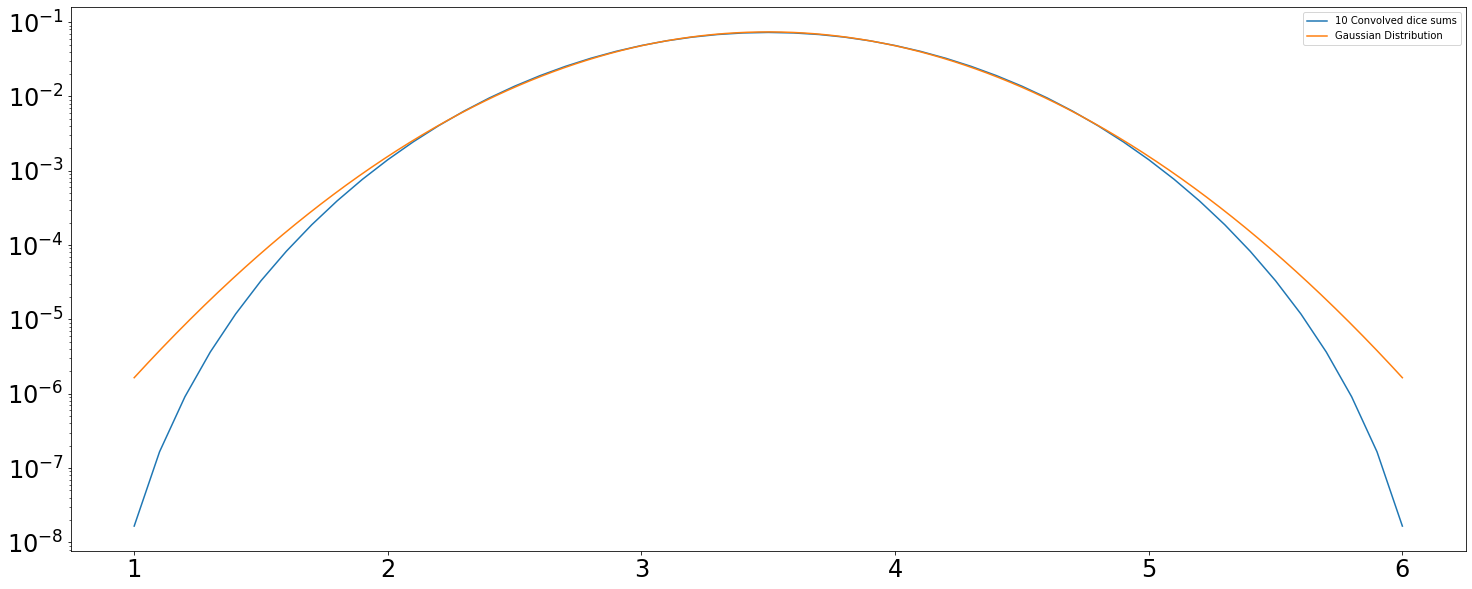

In [6]:
plt.rcParams["figure.figsize"] = (25,10)

dice_dist = stats.rv_discrete(values = (sums10, conv10))

plt.tick_params(labelsize = 24)
plt.plot(sums10, conv10, label='10 Convolved dice sums')
x = np.linspace(1,6,1000)
plt.plot(x, stats.norm.pdf(x,loc=dice_dist.mean(), scale=dice_dist.std()) / 10,
        label = 'Gaussian Distribution')
plt.yscale('log')
plt.legend()

The first of the last three plots is the probabilities of the averages of 10 dice. The following show that distribution compared to a gaussian distribution of the same mean and standard deviation. The central limit theorem says that the sum of many independent distributions approaches a gaussian seems to make sense when looking at the first of the two graphs comparing the convolution of 10 dice distributions to the gaussian distribution. When looking at the two graphs compared on a semi log plot, it is clear that around probabilities of 0.001% the two plots begin to diverge. This suggests that maybe a gaussian is an OK approximation up to these probabilities. 

4) The below is the plot of two gaussian distributions that will be used to show that the sum and average of two gaussian distributions is also a gaussain. Further more, the mean of the summed gaussian distributions is the mean of the two gaussian distributions combined and the standard deviation of the sum of the two gaussians is the square root of the sum of the variances. 

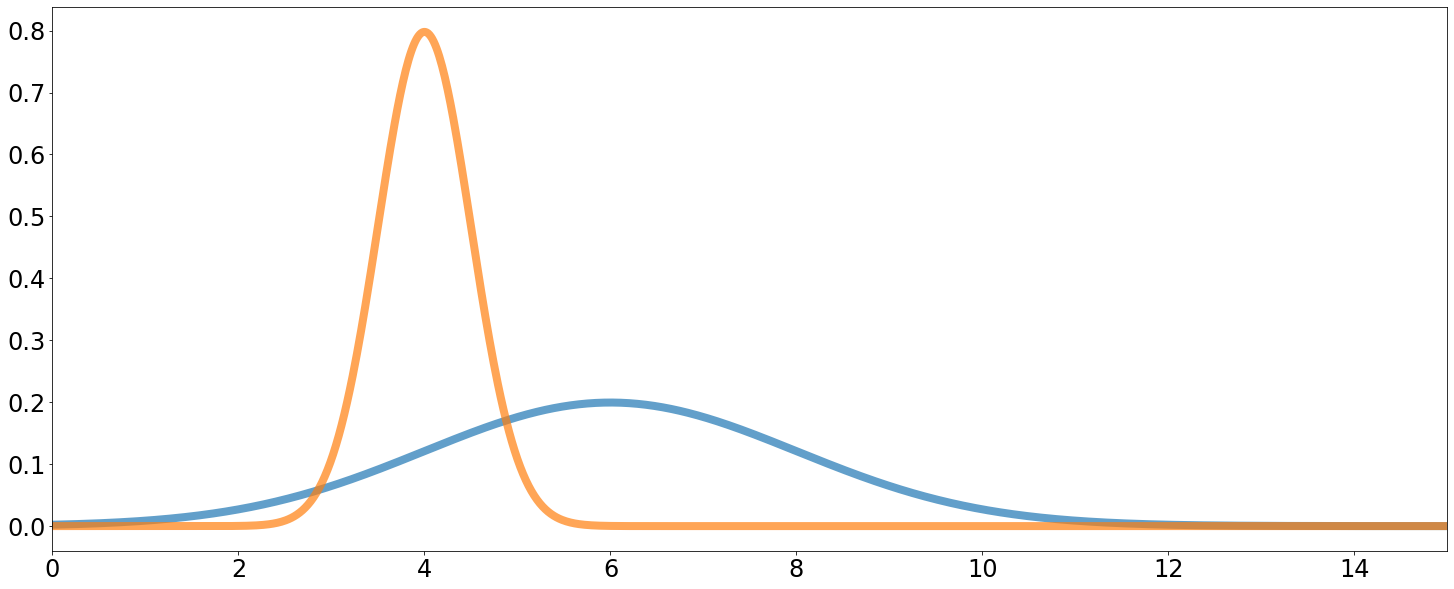

In [25]:
fig, ax = plt.subplots(1, 1)

plt.tick_params(labelsize = 24)
plt.xlim([0,15])
x = np.linspace(0,15,1000)
ax.plot(x,stats.norm.pdf(x,loc = 6, scale = 2),linewidth = 8,alpha = 0.7)
ax.plot(x,stats.norm.pdf(x,loc = 4, scale = 0.5),linewidth = 8,alpha = 0.7)
plt.show()

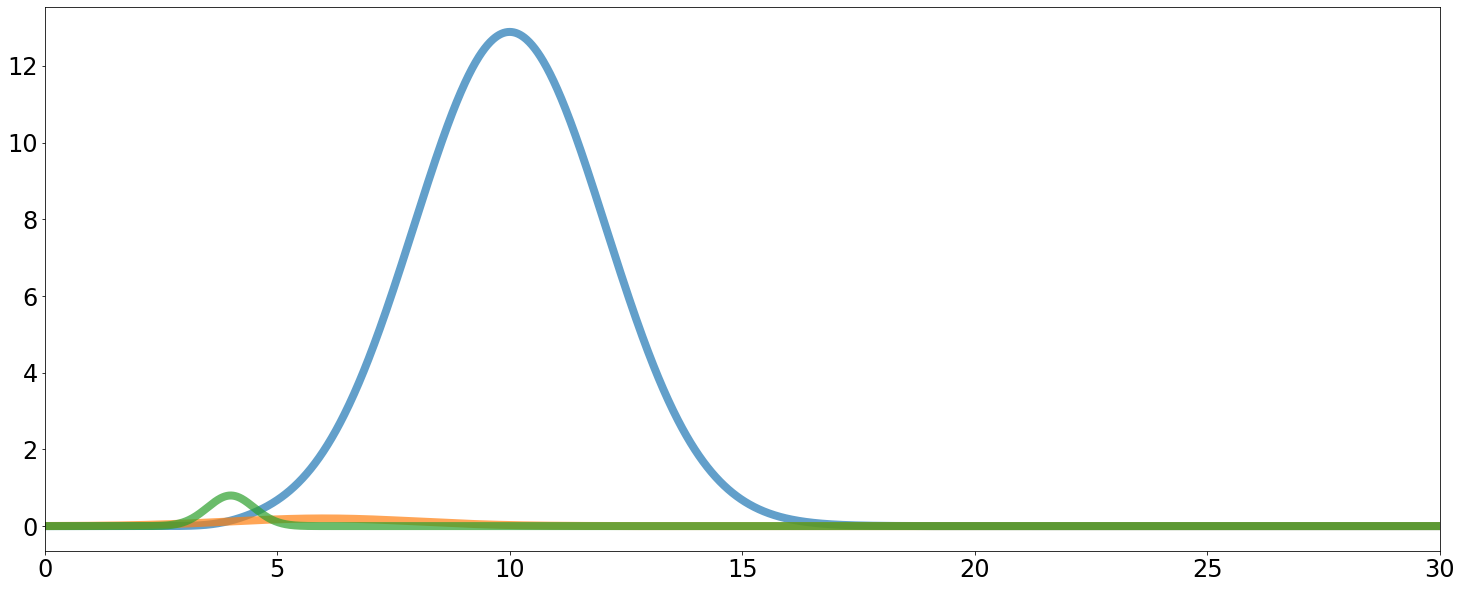

In [36]:
conv = np.convolve(stats.norm.pdf(x,loc = 6, scale = 2),
                   stats.norm.pdf(x,loc = 4, scale = 0.5))

fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 24)
plt.xlim([0,30])
xconv = np.linspace(0,30,len(conv))

ax.plot(xconv, conv, linewidth = 8, alpha = 0.7)
ax.plot(xconv, stats.norm.pdf(xconv, loc = 6, scale = 2), linewidth = 8, alpha = 0.7)
ax.plot(xconv, stats.norm.pdf(xconv, loc = 4, scale = 0.5), linewidth = 8, alpha = 0.7)